Net(
  (fc1): Linear(in_features=2, out_features=1, bias=False)
)
[Parameter containing:
tensor([[ 1., -1.]], requires_grad=True)]
Epoch 0 - loss: 39.33453369140625
Epoch 1 - loss: 80.6256332397461
Epoch 2 - loss: 37.8299560546875
Epoch 3 - loss: 75.12151336669922
Epoch 4 - loss: 37.67473220825195
Epoch 5 - loss: 74.59152221679688
Epoch 6 - loss: 37.39509201049805
Epoch 7 - loss: 74.14081573486328
Epoch 8 - loss: 37.116363525390625
Epoch 9 - loss: 73.69502258300781
Epoch 10 - loss: 36.84051513671875
Epoch 11 - loss: 73.25292205810547
Epoch 12 - loss: 36.56754684448242
Epoch 13 - loss: 72.81443786621094
Epoch 14 - loss: 36.29745101928711
Epoch 15 - loss: 72.37959289550781
Epoch 16 - loss: 36.030208587646484
Epoch 17 - loss: 71.94832611083984
Epoch 18 - loss: 35.765777587890625
Epoch 19 - loss: 71.5206298828125
Epoch 20 - loss: 35.50411605834961
Epoch 21 - loss: 71.09642791748047
Epoch 22 - loss: 35.24522018432617
Epoch 23 - loss: 70.67571258544922
Epoch 24 - loss: 34.98905563354492
Epoc

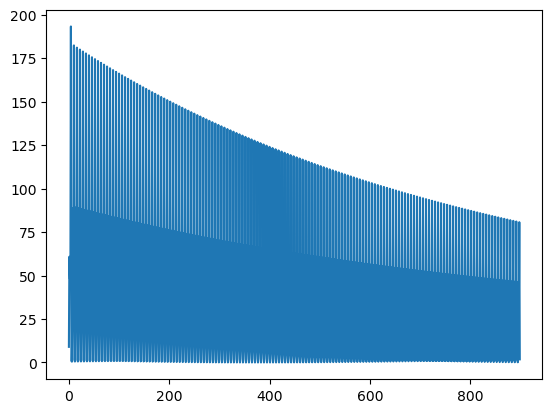

In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import matplotlib.pyplot as plt

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2,1,bias=False)
    def forward(self, x):
        x = self.fc1(x)
        return x

net = Net()
print(net)


net.fc1.weight = torch.nn.Parameter(torch.tensor([[1., -1.]], requires_grad=True))

print(list(net.parameters()))

#input = torch.randn(1,2)
#out = net(input)


criterion = nn.MSELoss()
#def criterion(out, label):
#    return ((label - out)**2).mean()


optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)
#optimizer = optim.Adam(net.parameters(), lr=0.005)


data = torch.tensor([[1.,3.], [2.,6.], [3.,9.]], dtype=torch.float)
target = torch.tensor([[1.],[5.],[13.]], dtype=torch.float)

hist = []

############## SGD based update ##############       
      
for epoch in range(300):
    train_loss = 0.0
    for i, current_data in enumerate(data):
        optimizer.zero_grad()
        outputs = net(current_data)
        loss = criterion(outputs, target[i])
        loss.backward()
        hist.append(loss.detach())
        optimizer.step()
        train_loss += loss
    print("Epoch {} - loss: {}".format(epoch, train_loss/len(data)))
####################################################


### Test the trained network ###
for i, current_data in enumerate(data):
    out = net(current_data)  
    print("when x = {}, y = {}".format(current_data, out))
    
plt.plot(hist, label = "training curve")